In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-01-26/readme.md

|variable       |class     |description |
|:---|:---|:-----------|
|country        |character |Country of cleanup |
|year           |double    | Year (2019 or 2020) |
|parent_company |character | Source of plastic |
|empty          |double    | Category left empty count |
|hdpe           |double    | High density polyethylene count (Plastic milk containers, plastic bags, bottle caps, trash cans, oil cans, plastic lumber, toolboxes, supplement containers) |
|ldpe           |double    | Low density polyethylene count (Plastic bags, Ziploc bags, buckets, squeeze bottles, plastic tubes, chopping boards) |
|o              |double    | Category marked other count |
|pet            |double    | Polyester plastic count (Polyester fibers, soft drink bottles, food containers (also see plastic bottles) |
|pp             |double    | Polypropylene count (Flower pots, bumpers, car interior trim, industrial fibers, carry-out beverage cups, microwavable food containers, DVD keep cases) |
|ps             |double    | Polystyrene count (Toys, video cassettes, ashtrays, trunks, beverage/food coolers, beer cups, wine and champagne cups, carry-out food containers, Styrofoam) |
|pvc            |double    | PVC plastic count (Window frames, bottles for chemicals, flooring, plumbing pipes) |
|grand_total    |double    | Grand total count (all types of plastic) |
|num_events     |double    | Number of counting events |
|volunteers     |double    | Number of volunteers |

## Load data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-26/plastics.csv')

In [34]:
df.head(10)

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,0.0,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
1,Argentina,2019,Unbranded,0.0,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4,243.0
2,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0
3,Argentina,2019,Secco,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0
4,Argentina,2019,Doble Cola,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0
5,Argentina,2019,Pritty,0.0,0.0,0.0,0.0,22.0,7.0,0.0,0.0,29.0,4,243.0
6,Argentina,2019,PepsiCo,0.0,0.0,0.0,0.0,21.0,6.0,0.0,0.0,27.0,4,243.0
7,Argentina,2019,Casoni,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,26.0,4,243.0
8,Argentina,2019,Villa Del Sur - Levite,0.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,20.0,4,243.0
9,Argentina,2019,Manaos,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,18.0,4,243.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13380 entries, 0 to 13379
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         13380 non-null  object 
 1   year            13380 non-null  int64  
 2   parent_company  13329 non-null  object 
 3   empty           10137 non-null  float64
 4   hdpe            11734 non-null  float64
 5   ldpe            11303 non-null  float64
 6   o               13113 non-null  float64
 7   pet             13166 non-null  float64
 8   pp              11884 non-null  float64
 9   ps              11408 non-null  float64
 10  pvc             9052 non-null   float64
 11  grand_total     13366 non-null  float64
 12  num_events      13380 non-null  int64  
 13  volunteers      13273 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 1.4+ MB


In [7]:
df['country'].unique()

array(['Argentina', 'Australia', 'Bangladesh', 'Benin', 'Bhutan',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Canada',
       'China', 'Colombia', 'Cote D_ivoire', 'Cyprus', 'ECUADOR', 'EMPTY',
       'France', 'Germany', 'Ghana', 'Hong Kong', 'India', 'Indonesia',
       'Ireland', 'Italy', 'Japan', 'Kenya', 'Latvia', 'Luxembourg',
       'Malaysia', 'Maldives', 'Mexico', 'Montenegro', 'NIGERIA',
       'Netherlands', 'Philippines', 'Portugal', 'Rwanda', 'Slovenia',
       'South Africa', 'Spain', 'Sri Lanka', 'Switzerland',
       'Taiwan_ Republic of China (ROC)', 'Tanzania', 'Thailand',
       'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States of America', 'Vietnam', 'Armenia',
       'Chile', 'Denmark', 'Ecuador', 'El Salvador', 'Greece', 'Honduras',
       'Korea', 'Kuwait', 'Lithuania', 'Nigeria', 'Peru', 'Romania',
       'Serbia', 'Singapore', 'Togo',
       'United Kingdom of Great Britain & Northern Ireland'], dtype=

In [11]:
df['parent_company'].unique()

array(['Grand Total', 'Unbranded', 'The Coca-Cola Company', ...,
       'VINH HAO CO.', 'Vital', 'VM Group'], dtype=object)

In [38]:
df['num_events'].unique()

array([  4,   1,   3,  10,  48, 145,   2,   7,  32,   9,  35,   5,  14,
        20,  12,   6,  21,  42,  24,  56,  50,  26,  18,  17,  11,  15,
         8, 134])

In [39]:
df['volunteers'].unique()

array([2.4300e+02, 5.0000e+00, 1.0000e+02, 2.3280e+03, 5.3000e+03,
       4.1900e+02, 1.5000e+01, 2.3500e+02, 3.8700e+02, 9.0000e+00,
       1.4390e+03, 5.2530e+03, 1.5000e+03, 3.0000e+01, 4.5500e+02,
       1.4160e+03, 1.3000e+01, 1.1000e+03, 6.7000e+01, 8.8000e+01,
       6.8500e+03, 1.0000e+00, 1.7500e+02, 1.2930e+03, 1.5600e+03,
       2.1000e+01, 3.0000e+02, 2.0000e+00, 4.8000e+01, 5.6300e+02,
       1.6480e+03, 8.2700e+02, 3.7510e+03, 4.3000e+01, 8.2000e+01,
       5.1100e+02, 3.3000e+02, 3.2700e+02, 3.1318e+04, 1.0300e+02,
       3.7400e+02, 3.2000e+01, 3.1200e+02, 1.1400e+02, 3.0000e+00,
       7.4000e+02, 4.0000e+02, 6.0000e+00, 1.9000e+02, 1.2700e+02,
       4.5800e+02, 7.8000e+01, 5.0000e+01, 1.6300e+02, 2.1750e+03,
       2.7400e+02, 1.2100e+02, 2.2000e+01, 1.0000e+01, 2.4000e+01,
       3.1000e+02, 7.3000e+01, 1.2000e+01, 3.5300e+02, 3.9200e+02,
       7.0000e+00, 1.5400e+02, 6.0800e+02,        nan, 3.7000e+02,
       8.3000e+01, 4.1600e+02, 2.0990e+03, 4.5000e+01, 9.1500e

Number of unique values:

In [43]:
for col in df.columns:
    print(col, ':', df[col].unique().shape)

country : (69,)
year : (2,)
parent_company : (10821,)
empty : (30,)
hdpe : (105,)
ldpe : (190,)
o : (274,)
pet : (280,)
pp : (169,)
ps : (80,)
pvc : (44,)
grand_total : (472,)
num_events : (28,)
volunteers : (89,)


Each country/year combination has a num_events count and a volunteer count

## Some EDA

### What is this Grand Total in parent_company?

In [33]:
df.groupby(['parent_company']).sum().reset_index().sort_values('grand_total', ascending=False).head(10)

,parent_company,year,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
3466,Grand Total,104988,0.0,9320.0,39589.0,259069.0,96898.0,17988.0,5890.0,477.0,429231.0,483,72236.0
9143,Unbranded,171663,3031.0,11736.0,26802.0,264657.0,28640.0,18274.0,9700.0,1235.0,364075.0,965,67159.0
8771,The Coca-Cola Company,179742,23.0,1610.0,423.0,1269.0,20745.0,1308.0,52.0,100.0,25530.0,1037,40757.0
4884,La Doo,2019,0.0,0.0,0.0,0.0,15221.0,0.0,0.0,0.0,15221.0,14,1648.0
9187,Universal Robina Corporation,28275,0.0,0.0,189.0,1816.0,477.0,6100.0,19.0,50.0,8651.0,388,8575.0
6103,Nestle,74740,215.0,55.0,208.0,1493.0,547.0,6054.0,9.0,61.0,8642.0,509,9938.0
9173,Unilever,121177,5.0,353.0,1081.0,3364.0,456.0,3308.0,3.0,19.0,8589.0,924,35555.0
1828,Colgate-Palmolive,86841,4.0,132.0,35.0,690.0,54.0,5617.0,6.0,7.0,6545.0,804,27737.0
819,Barna,2019,0.0,0.0,0.0,0.0,6225.0,0.0,0.0,0.0,6225.0,14,1648.0
620,Assorted,6057,0.0,0.0,0.0,2601.0,3500.0,0.0,0.0,0.0,6101.0,5,10972.0


In [20]:
condition_2020 = df['year'] == 2020
condition_2019 = df['year'] == 2019
condition_grand_total = df['parent_company'] == 'Grand Total'

In [30]:
pd.DataFrame(df.loc[condition_2019 & (df['country']=='Argentina') & (~condition_grand_total)].sum()).tail(10)

,0
hdpe,215.0
ldpe,55.0
o,607.0
pet,1376.0
pp,281.0
ps,116.0
pvc,18.0
grand_total,2668.0
num_events,1096
volunteers,66582.0


In [24]:
df.loc[condition_grand_total].head()

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,0.0,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
276,Australia,2019,Grand Total,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,1,5.0
277,Bangladesh,2019,Grand Total,0.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,16.0,1,100.0
304,Benin,2019,Grand Total,NaN,NaN,NaN,NaN,4988.0,NaN,NaN,NaN,4988.0,1,2328.0
306,Bhutan,2019,Grand Total,0.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,3500.0,1,5300.0


#### remove Grand Total from parent_company

In [35]:
df = df.loc[~condition_grand_total]

### Top 10 for 2020 by grand_total (all plastics summed up)

In [37]:
df.loc[condition_2020].groupby(['parent_company']).sum().reset_index().sort_values('grand_total', ascending=False).head(10)

,parent_company,year,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
2732,Unbranded,96960,3031.0,7711.0,10594.0,65839.0,11529.0,8220.0,5346.0,1049.0,113319.0,567,12010.0
2617,The Coca-Cola Company,103020,23.0,734.0,364.0,305.0,11498.0,854.0,8.0,49.0,13835.0,570,14699.0
1760,Nestle,74740,215.0,55.0,208.0,1493.0,547.0,6054.0,9.0,61.0,8642.0,509,9938.0
2753,Universal Robina Corporation,18180,0.0,0.0,11.0,232.0,57.0,6052.0,6.0,50.0,6408.0,211,2641.0
551,Colgate-Palmolive,48480,4.0,116.0,9.0,153.0,46.0,5574.0,2.0,7.0,5911.0,469,7945.0
2748,Unilever,74740,5.0,291.0,136.0,1661.0,336.0,3108.0,2.0,19.0,5558.0,537,12952.0
2033,Pepsico,86860,10.0,274.0,240.0,675.0,3373.0,531.0,10.0,42.0,5155.0,549,13335.0
1606,Mayora Indah,18180,2.0,84.0,3.0,109.0,275.0,4026.0,0.0,0.0,4499.0,201,3287.0
2577,Tamil Nadu Co-operative Milk Producers' Federa...,2020,0.0,0.0,4229.0,10.0,9.0,2.0,0.0,0.0,4250.0,56,353.0
2117,Procter & Gamble,58580,8.0,75.0,65.0,602.0,184.0,2575.0,4.0,22.0,3535.0,514,9201.0


### Basic plots

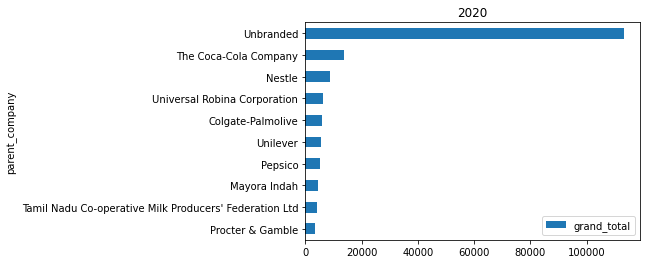

In [59]:
df.loc[condition_2020].groupby(['parent_company']) \
.sum().reset_index().sort_values('grand_total', ascending=True).tail(10) \
.plot.barh(y='grand_total', x='parent_company', title='2020');

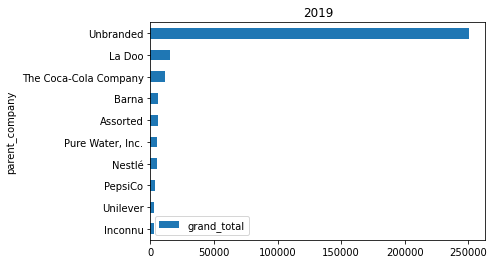

In [60]:
df.loc[condition_2019].groupby(['parent_company']) \
.sum().reset_index().sort_values('grand_total', ascending=True).tail(10) \
.plot.barh(y='grand_total', x='parent_company', title='2019');

### Number of events per country

In [69]:
df_event = df[['year', 'country', 'num_events', 'volunteers']].drop_duplicates()

In [75]:
df_event['num_volunteers_per_event'] = df_event['volunteers'] / df_event['num_events']

In [76]:
df_event.head()

,year,country,num_events,volunteers,num_volunteers_per_event
1,2019,Argentina,4,243.0,60.75
275,2019,Australia,1,5.0,5.00
278,2019,Bangladesh,1,100.0,100.00
303,2019,Benin,1,2328.0,2328.00
305,2019,Bhutan,1,5300.0,5300.00


In [77]:
df_event.sort_values('volunteers', ascending=False).head()

,year,country,num_events,volunteers,num_volunteers_per_event
7059,2019,Taiwan_ Republic of China (ROC),2,31318.0,15659.0000
3566,2019,Indonesia,32,6850.0,214.0625
305,2019,Bhutan,1,5300.0,5300.0000
1308,2019,Colombia,1,5253.0,5253.0000
5625,2019,Philippines,20,3751.0,187.5500


In [78]:
df_event.sort_values('num_volunteers_per_event', ascending=False).head()

,year,country,num_events,volunteers,num_volunteers_per_event
7059,2019,Taiwan_ Republic of China (ROC),2,31318.0,15659.0
305,2019,Bhutan,1,5300.0,5300.0
1308,2019,Colombia,1,5253.0,5253.0
303,2019,Benin,1,2328.0,2328.0
9953,2020,China,1,2175.0,2175.0


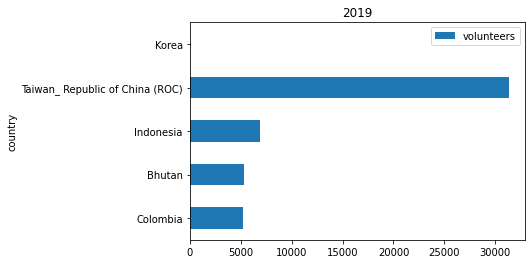

In [81]:
df_event.sort_values('volunteers', ascending=True).tail() \
.plot.barh(y='volunteers', x='country', title='2019');

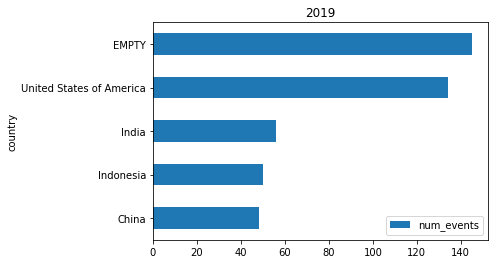

In [83]:
df_event.sort_values('num_events', ascending=True).tail() \
.plot.barh(y='num_events', x='country', title='2019');

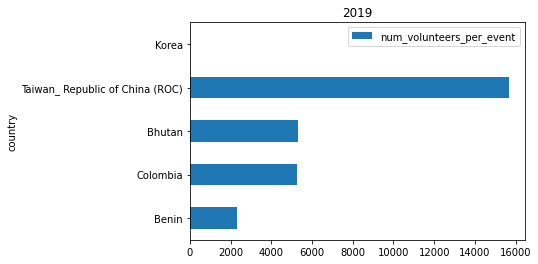

In [80]:
df_event.sort_values('num_volunteers_per_event', ascending=True).tail() \
.plot.barh(y='num_volunteers_per_event', x='country', title='2019');